## Section 1, Part A

In [13]:
import pandas as pd
from collections import Counter
import numpy as np
import re
import matplotlib.pyplot as plt
tweet_data = pd.read_csv("training_data.csv")
#print(tweet_data.head())
print (tweet_data.columns)
#print(np.mean(tweet_data['retweet_count']))

Index(['favorite_count', 'full_text', 'hashtags', 'retweet_count', 'year',
       'dim1_nominate', 'dim2_nominate'],
      dtype='object')


(a) Create a table that contains information on minimum, average, median, and maximum for the
following: tweet length (#characters and #words) (text column), hashtag length (#characters and
#words) (hashtags column) (Add your table to the report.) (4 points) (2 points for graduate
students)

In [3]:
# find tweet length (characters).
def tweetchar (tweet):
    return len(tweet) - 3
    # Tweets follow a format of b' {text} ' - so, three characters which don't actually add anything. What's inside of that is the actual tweet.
    # While I could strip out the first two and last character I feel like that'll add up in terms of time.
    # also i cba rn lmao, maybe later

# find tweet length (words).
def tweetlength (tweet):
    words = re.findall(r'\w+', tweet[1::])
    return len(words)

# find hashtag length (characters)
def hashtagchar (hashtags):
   tags = hashtags.split(' ')
   count = 0
   for tags in tags:
       count += len(tags)
   return count

#find number of hashtags
def hashtagnum (hashtags):
   tags = hashtags.split(' ')
   return len(tags)

In [4]:
print(tweet_data.shape)
hashtag_characters = np.empty(0)
hashtag_numbers = np.empty(0)
i = 0
for hashtag in tweet_data['hashtags']:
    hashtag_characters = np.append(hashtag_characters, hashtagchar(hashtag))
    hashtag_numbers = np.append(hashtag_numbers, hashtagnum(hashtag))




(333987, 7)


In [5]:
df_describe_hashtagchars = pd.DataFrame(hashtag_characters)
df_describe_hashtagchars.describe()

,0
count,333987.000000
mean,14.044142
std,9.520043
min,1.000000
25%,8.000000
50%,12.000000
75%,18.000000
max,168.000000


In [6]:
df_describe_hashtagnums = pd.DataFrame(hashtag_numbers)
df_describe_hashtagnums.describe()
#For some reason, at least some IDEs, this doesn't display properly until you run it seperately. Seems to work in Jupyter Notebook, though, so...

,0
count,333987.00000
mean,1.49198
std,0.84594
min,1.00000
25%,1.00000
50%,1.00000
75%,2.00000
max,17.00000


In [7]:
tweet_characters = np.empty(0)
tweet_words = np.empty(0)
i = 0
for tweet in tweet_data['full_text']:
    tweet_characters = np.append(tweet_characters, tweetchar(tweet))
    tweet_words = np.append(tweet_words, tweetlength(tweet))



In [8]:
df_describe_tweetwords = pd.DataFrame(tweet_words)
df_describe_tweetwords.describe()


,0
count,333987.000000
mean,29.607251
std,13.232416
min,1.000000
25%,20.000000
50%,25.000000
75%,40.000000
max,598.000000


In [9]:
df_describe_tweetchars = pd.DataFrame(tweet_characters)
df_describe_tweetchars.describe()

,0
count,333987.000000
mean,180.176139
std,74.561726
min,4.000000
25%,130.000000
50%,151.000000
75%,245.000000
max,2434.000000


b) Find the top ten most commonly used hashtags (hashtags column). Then, create a bar chart which show the count values of these ten most commonly used hashtags. Do you observe any patterns? What are the meanings / interpretations of the hashtags you have identified? Write your findings in the report. (Add the bar chart to the report.) (4 points) (2 points for graduate students)

[('COVID19', 4870), ('SOTU', 2901), ('Obamacare', 2182), ('coronavirus', 1524), ('utpol', 1387), ('GOPTaxScam', 1349), ('TaxReform', 1248), ('ProtectOurCare', 1237), ('IA03', 1214), ('ForThePeople', 1085)]


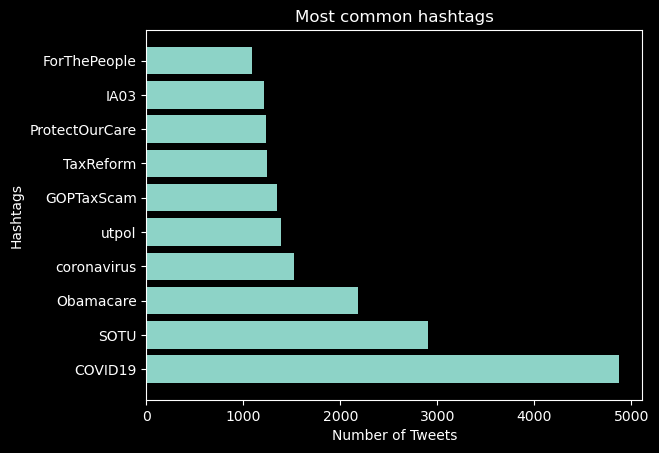

In [31]:
a = Counter(tweet_data['hashtags']).most_common(10)
hashtags = list()
hastagnums = list()
print(a)
for h in a:
    hashtags.append(h[0])
    hastagnums.append(h[1])
n = plt.barh(hashtags, hastagnums)
plt.title('Most common hashtags')
plt.xlabel('Number of Tweets')
plt.ylabel('Hashtags')
plt.show()

- Big events like the State of the Union, hot-button issues like Obamacare or the pandemic attract the most attention

c) To answer this question, first please read the description above DW-NOMINATE scores provided
at the beginning of this assignment document. Then, please divide your training dataset into four
subsets by focusing on the following ideological dimensions:

a. Group 1: Dim 1 (0 to 1), Dim 2 (0 to 1)

b. Group 2: Dim 1 (0 to 1), Dim 2 (0 to -1)

c. Group 3: Dim 1 (0 to -1), Dim 2 (0 to 1)

d. Group 4: Dim 1 (0 to -1), Dim 2) (0 to -1)

In [32]:
group1 = tweet_data[(tweet_data['dim1_nominate'] > 0) & tweet_data['dim2_nominate'] > 0]
group2 = tweet_data[(tweet_data['dim1_nominate'] > 0) & tweet_data['dim2_nominate'] <= 0]
group3 = tweet_data[(tweet_data['dim1_nominate'] <= 0) & tweet_data['dim2_nominate'] > 0]
group4 = tweet_data[(tweet_data['dim1_nominate'] <= 0) & tweet_data['dim2_nominate'] <= 0]



[('Obamacare', 2064), ('COVID19', 1791), ('SOTU', 1777), ('TaxReform', 1199), ('IA03', 1078), ('utpol', 1043), ('MS01', 888), ('taxreform', 879), ('coronavirus', 790), ('SouthJersey', 754)]


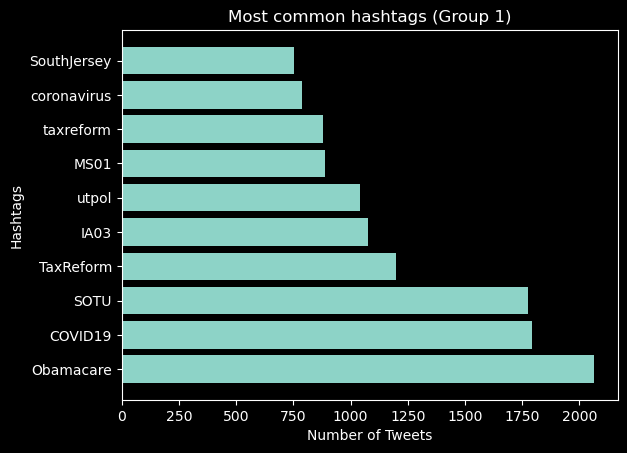

In [33]:
#Group 1 Bargraph: Dim 1 (0 to 1), Dim 2 (0 to 1)
a = Counter(group1['hashtags']).most_common(10)
print(a)
hashtags = list()
hastagnums = list()
for h in a:
    hashtags.append(h[0])
    hastagnums.append(h[1])
n = plt.barh(hashtags, hastagnums)
plt.title('Most common hashtags (Group 1)')
plt.xlabel('Number of Tweets')
plt.ylabel('Hashtags')
plt.show()

[('COVID19', 3079), ('GOPTaxScam', 1348), ('ProtectOurCare', 1237), ('SOTU', 1124), ('ForThePeople', 1084), ('GetCovered', 982), ('ACA', 919), ('Trumpcare', 865), ('TrumpShutdown', 803), ('coronavirus', 734)]


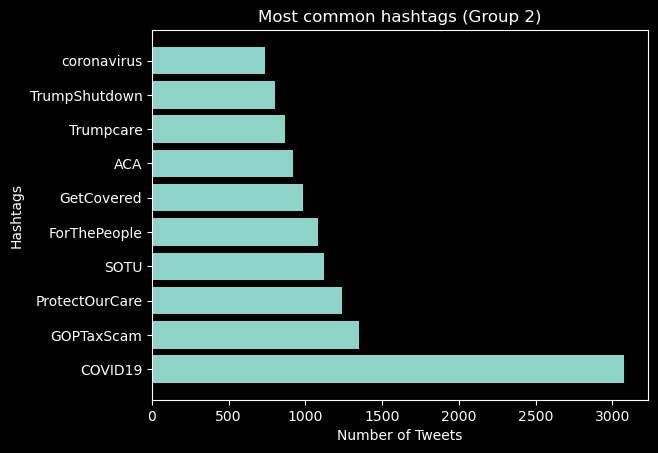

In [39]:
#Group 2 Bargraph: Dim 1 (0 to 1), Dim 2 (0 to -1)

a = Counter(group2['hashtags']).most_common(10)
print(a)
hashtags = list()
hastagnums = list()
for h in a:
    hashtags.append(h[0])
    hastagnums.append(h[1])
n = plt.barh(hashtags, hastagnums)
plt.title('Most common hashtags (Group 2)')
plt.xlabel('Number of Tweets')
plt.ylabel('Hashtags')
plt.show()

[('COVID19', 3079), ('GOPTaxScam', 1348), ('ProtectOurCare', 1237), ('SOTU', 1124), ('ForThePeople', 1084), ('GetCovered', 982), ('ACA', 919), ('Trumpcare', 865), ('TrumpShutdown', 803), ('coronavirus', 734)]


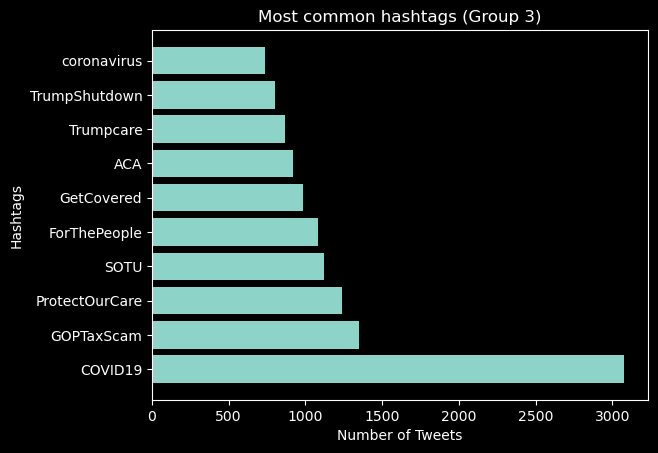

In [40]:
#Group 3 Bargraph: Dim 1 (0 to -1), Dim 2 (0 to 1)

a = Counter(group3['hashtags']).most_common(10)
print(a)
hashtags = list()
hastagnums = list()
for h in a:
    hashtags.append(h[0])
    hastagnums.append(h[1])
n = plt.barh(hashtags, hastagnums)
plt.title('Most common hashtags (Group 3)')
plt.xlabel('Number of Tweets')
plt.ylabel('Hashtags')
plt.show()

[('Obamacare', 2064), ('COVID19', 1791), ('SOTU', 1777), ('TaxReform', 1199), ('IA03', 1078), ('utpol', 1043), ('MS01', 888), ('taxreform', 879), ('coronavirus', 790), ('SouthJersey', 754)]


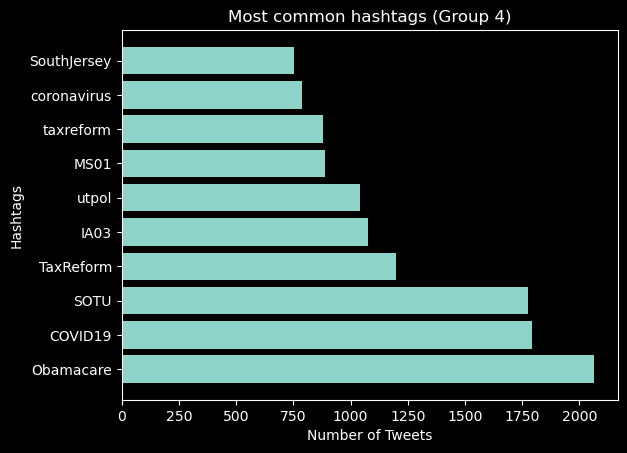

In [41]:
#Group 4 Bargraph: Dim 1 (0 to -1), Dim 2 (0 to -1)

a = Counter(group4['hashtags']).most_common(10)
print(a)
hashtags = list()
hastagnums = list()
for h in a:
    hashtags.append(h[0])
    hastagnums.append(h[1])
n = plt.barh(hashtags, hastagnums)
plt.title('Most common hashtags (Group 4)')
plt.xlabel('Number of Tweets')
plt.ylabel('Hashtags')
plt.show()